# Madhur Jaripatke
### Roll No. 48
### TE A Computer
### RMDSSOE, Warje, Pune

###  2. Data Wrangling, II
Create an “Academic performance” dataset of students and perform the following operations 
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values 
and/or inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
techniques to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to 
decrease the skewness and convert the distribution into a normal distribution. 
Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Create Dataset

In [2]:
dic = {
    "Name":["abc","lmn","stu","xyz","efg","klm","rst","uvw",np.nan,"def"],
    "Maths":[96,88,np.nan,73,44,88,72,84,93,92],
    "Reading":[77,200,88,np.nan,np.nan,91,78,np.nan,84,93],
    "Writing":[86,np.nan,170,87,69,91,np.nan,88,92,83],
    "Placement":[88,76,91,84,96,84,80,78,np.nan,93],
    "Gender":["Male","Female",np.nan,"Female","Female","Male","Female","Male", "Male", "Male"],
    "Joining Date":[2018,2019,2022,2018,2017,2023,2016,2020,2020,2019]
}

# Create DataFrame & Exploring Dataset

In [3]:
df = pd.DataFrame(dic)
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.0,77.0,86.0,88.0,Male,2018
1,lmn,88.0,200.0,NaN,76.0,Female,2019
2,stu,NaN,88.0,170.0,91.0,NaN,2022
3,xyz,73.0,NaN,87.0,84.0,Female,2018
4,efg,44.0,NaN,69.0,96.0,Female,2017
5,klm,88.0,91.0,91.0,84.0,Male,2023
6,rst,72.0,78.0,NaN,80.0,Female,2016
7,uvw,84.0,NaN,88.0,78.0,Male,2020
8,NaN,93.0,84.0,92.0,NaN,Male,2020
9,def,92.0,93.0,83.0,93.0,Male,2019


In [4]:
df.isnull()

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False
2,False,True,False,False,False,True,False
3,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False
7,False,False,True,False,False,False,False
8,True,False,False,False,True,False,False
9,False,False,False,False,False,False,False


In [5]:
df.notnull()

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,True,True,True,True,True,True,True
1,True,True,True,False,True,True,True
2,True,False,True,True,True,False,True
3,True,True,False,True,True,True,True
4,True,True,False,True,True,True,True
5,True,True,True,True,True,True,True
6,True,True,True,False,True,True,True
7,True,True,False,True,True,True,True
8,False,True,True,True,False,True,True
9,True,True,True,True,True,True,True


# Handling Missing Values

In [6]:
df['Maths'] = df['Maths'].fillna(df['Maths'].mean())
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.000000,77.0,86.0,88.0,Male,2018
1,lmn,88.000000,200.0,NaN,76.0,Female,2019
2,stu,81.111111,88.0,170.0,91.0,NaN,2022
3,xyz,73.000000,NaN,87.0,84.0,Female,2018
4,efg,44.000000,NaN,69.0,96.0,Female,2017
5,klm,88.000000,91.0,91.0,84.0,Male,2023
6,rst,72.000000,78.0,NaN,80.0,Female,2016
7,uvw,84.000000,NaN,88.0,78.0,Male,2020
8,NaN,93.000000,84.0,92.0,NaN,Male,2020
9,def,92.000000,93.0,83.0,93.0,Male,2019


In [7]:
df['Writing'] = df['Writing'].fillna(df['Writing'].median())
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.000000,77.0,86.0,88.0,Male,2018
1,lmn,88.000000,200.0,87.5,76.0,Female,2019
2,stu,81.111111,88.0,170.0,91.0,NaN,2022
3,xyz,73.000000,NaN,87.0,84.0,Female,2018
4,efg,44.000000,NaN,69.0,96.0,Female,2017
5,klm,88.000000,91.0,91.0,84.0,Male,2023
6,rst,72.000000,78.0,87.5,80.0,Female,2016
7,uvw,84.000000,NaN,88.0,78.0,Male,2020
8,NaN,93.000000,84.0,92.0,NaN,Male,2020
9,def,92.000000,93.0,83.0,93.0,Male,2019


In [8]:
df['Placement'] = df['Placement'].fillna(df['Placement'].mode())
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.000000,77.0,86.0,88.0,Male,2018
1,lmn,88.000000,200.0,87.5,76.0,Female,2019
2,stu,81.111111,88.0,170.0,91.0,NaN,2022
3,xyz,73.000000,NaN,87.0,84.0,Female,2018
4,efg,44.000000,NaN,69.0,96.0,Female,2017
5,klm,88.000000,91.0,91.0,84.0,Male,2023
6,rst,72.000000,78.0,87.5,80.0,Female,2016
7,uvw,84.000000,NaN,88.0,78.0,Male,2020
8,NaN,93.000000,84.0,92.0,NaN,Male,2020
9,def,92.000000,93.0,83.0,93.0,Male,2019


In [9]:
df['Writing'] = df['Writing'].fillna(df['Writing'].max())
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.000000,77.0,86.0,88.0,Male,2018
1,lmn,88.000000,200.0,87.5,76.0,Female,2019
2,stu,81.111111,88.0,170.0,91.0,NaN,2022
3,xyz,73.000000,NaN,87.0,84.0,Female,2018
4,efg,44.000000,NaN,69.0,96.0,Female,2017
5,klm,88.000000,91.0,91.0,84.0,Male,2023
6,rst,72.000000,78.0,87.5,80.0,Female,2016
7,uvw,84.000000,NaN,88.0,78.0,Male,2020
8,NaN,93.000000,84.0,92.0,NaN,Male,2020
9,def,92.000000,93.0,83.0,93.0,Male,2019


In [10]:
df = pd.DataFrame(dic)
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.0,77.0,86.0,88.0,Male,2018
1,lmn,88.0,200.0,NaN,76.0,Female,2019
2,stu,NaN,88.0,170.0,91.0,NaN,2022
3,xyz,73.0,NaN,87.0,84.0,Female,2018
4,efg,44.0,NaN,69.0,96.0,Female,2017
5,klm,88.0,91.0,91.0,84.0,Male,2023
6,rst,72.0,78.0,NaN,80.0,Female,2016
7,uvw,84.0,NaN,88.0,78.0,Male,2020
8,NaN,93.0,84.0,92.0,NaN,Male,2020
9,def,92.0,93.0,83.0,93.0,Male,2019


# Drop Missing Values

In [11]:
df.dropna(how='all')

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.0,77.0,86.0,88.0,Male,2018
1,lmn,88.0,200.0,NaN,76.0,Female,2019
2,stu,NaN,88.0,170.0,91.0,NaN,2022
3,xyz,73.0,NaN,87.0,84.0,Female,2018
4,efg,44.0,NaN,69.0,96.0,Female,2017
5,klm,88.0,91.0,91.0,84.0,Male,2023
6,rst,72.0,78.0,NaN,80.0,Female,2016
7,uvw,84.0,NaN,88.0,78.0,Male,2020
8,NaN,93.0,84.0,92.0,NaN,Male,2020
9,def,92.0,93.0,83.0,93.0,Male,2019


In [12]:
df.dropna(how='any')

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.0,77.0,86.0,88.0,Male,2018
5,klm,88.0,91.0,91.0,84.0,Male,2023
9,def,92.0,93.0,83.0,93.0,Male,2019


In [13]:
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.0,77.0,86.0,88.0,Male,2018
1,lmn,88.0,200.0,NaN,76.0,Female,2019
2,stu,NaN,88.0,170.0,91.0,NaN,2022
3,xyz,73.0,NaN,87.0,84.0,Female,2018
4,efg,44.0,NaN,69.0,96.0,Female,2017
5,klm,88.0,91.0,91.0,84.0,Male,2023
6,rst,72.0,78.0,NaN,80.0,Female,2016
7,uvw,84.0,NaN,88.0,78.0,Male,2020
8,NaN,93.0,84.0,92.0,NaN,Male,2020
9,def,92.0,93.0,83.0,93.0,Male,2019


In [14]:
df.dropna(axis=0, how='any')

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.0,77.0,86.0,88.0,Male,2018
5,klm,88.0,91.0,91.0,84.0,Male,2023
9,def,92.0,93.0,83.0,93.0,Male,2019


In [15]:
df.dropna(axis=0, how='all')

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.0,77.0,86.0,88.0,Male,2018
1,lmn,88.0,200.0,NaN,76.0,Female,2019
2,stu,NaN,88.0,170.0,91.0,NaN,2022
3,xyz,73.0,NaN,87.0,84.0,Female,2018
4,efg,44.0,NaN,69.0,96.0,Female,2017
5,klm,88.0,91.0,91.0,84.0,Male,2023
6,rst,72.0,78.0,NaN,80.0,Female,2016
7,uvw,84.0,NaN,88.0,78.0,Male,2020
8,NaN,93.0,84.0,92.0,NaN,Male,2020
9,def,92.0,93.0,83.0,93.0,Male,2019


In [16]:
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.0,77.0,86.0,88.0,Male,2018
1,lmn,88.0,200.0,NaN,76.0,Female,2019
2,stu,NaN,88.0,170.0,91.0,NaN,2022
3,xyz,73.0,NaN,87.0,84.0,Female,2018
4,efg,44.0,NaN,69.0,96.0,Female,2017
5,klm,88.0,91.0,91.0,84.0,Male,2023
6,rst,72.0,78.0,NaN,80.0,Female,2016
7,uvw,84.0,NaN,88.0,78.0,Male,2020
8,NaN,93.0,84.0,92.0,NaN,Male,2020
9,def,92.0,93.0,83.0,93.0,Male,2019


In [17]:
df.dropna(axis=1, how='any')

,Joining Date
0,2018
1,2019
2,2022
3,2018
4,2017
5,2023
6,2016
7,2020
8,2020
9,2019


In [18]:
df.replace(to_replace=np.nan, value=60)

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date
0,abc,96.0,77.0,86.0,88.0,Male,2018
1,lmn,88.0,200.0,60.0,76.0,Female,2019
2,stu,60.0,88.0,170.0,91.0,60,2022
3,xyz,73.0,60.0,87.0,84.0,Female,2018
4,efg,44.0,60.0,69.0,96.0,Female,2017
5,klm,88.0,91.0,91.0,84.0,Male,2023
6,rst,72.0,78.0,60.0,80.0,Female,2016
7,uvw,84.0,60.0,88.0,78.0,Male,2020
8,60,93.0,84.0,92.0,60.0,Male,2020
9,def,92.0,93.0,83.0,93.0,Male,2019


In [19]:
dic = {
    "Name":["abc","lmn","stu","xyz","efg","klm","rst","uvw",np.nan,"def"],
    "Maths":[96,88,np.nan,73,44,88,72,84,93,92],
    "Reading":[77,200,88,np.nan,np.nan,91,78,np.nan,84,93],
    "Writing":[86,np.nan,170,87,69,91,np.nan,88,92,83],
    "Placement":[88,76,91,84,96,84,80,78,np.nan,93],
    "Gender":["Male","Female",np.nan,"Female","Female","Male","Female", "Male", "Male", "Male"],
    "Joining Date":[2018,2019,2022,2018,2017,2023,2016,2020,2020,2019],
    "Region":["Pune","Mumbai","Delhi",np.nan,"Surat","Solapur","Bengaluru","Kolkata",np.nan,"Pune"]
}

In [20]:
df = pd.DataFrame(dic)
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date,Region
0,abc,96.0,77.0,86.0,88.0,Male,2018,Pune
1,lmn,88.0,200.0,NaN,76.0,Female,2019,Mumbai
2,stu,NaN,88.0,170.0,91.0,NaN,2022,Delhi
3,xyz,73.0,NaN,87.0,84.0,Female,2018,NaN
4,efg,44.0,NaN,69.0,96.0,Female,2017,Surat
5,klm,88.0,91.0,91.0,84.0,Male,2023,Solapur
6,rst,72.0,78.0,NaN,80.0,Female,2016,Bengaluru
7,uvw,84.0,NaN,88.0,78.0,Male,2020,Kolkata
8,NaN,93.0,84.0,92.0,NaN,Male,2020,NaN
9,def,92.0,93.0,83.0,93.0,Male,2019,Pune


In [21]:
df['Region'].replace(to_replace=np.nan,value='Goa')

0         Pune
1       Mumbai
2        Delhi
3          Goa
4        Surat
5      Solapur
6    Bengaluru
7      Kolkata
8          Goa
9         Pune
Name: Region, dtype: object

<Axes: >

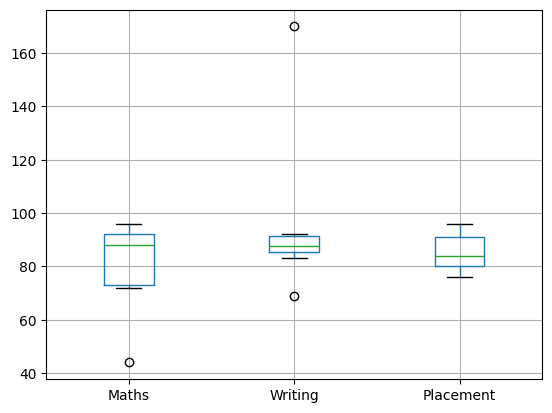

In [22]:
col = ['Maths', 'Writing','Placement']
df.boxplot(col)

In [23]:
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date,Region
0,abc,96.0,77.0,86.0,88.0,Male,2018,Pune
1,lmn,88.0,200.0,NaN,76.0,Female,2019,Mumbai
2,stu,NaN,88.0,170.0,91.0,NaN,2022,Delhi
3,xyz,73.0,NaN,87.0,84.0,Female,2018,NaN
4,efg,44.0,NaN,69.0,96.0,Female,2017,Surat
5,klm,88.0,91.0,91.0,84.0,Male,2023,Solapur
6,rst,72.0,78.0,NaN,80.0,Female,2016,Bengaluru
7,uvw,84.0,NaN,88.0,78.0,Male,2020,Kolkata
8,NaN,93.0,84.0,92.0,NaN,Male,2020,NaN
9,def,92.0,93.0,83.0,93.0,Male,2019,Pune


In [24]:
df.dropna(inplace=True)
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date,Region
0,abc,96.0,77.0,86.0,88.0,Male,2018,Pune
5,klm,88.0,91.0,91.0,84.0,Male,2023,Solapur
9,def,92.0,93.0,83.0,93.0,Male,2019,Pune


In [25]:
col1 = ['Maths', 'Writing','Placement']
df.boxplot(col1)

<Axes: >

In [26]:
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date,Region
0,abc,96.0,77.0,86.0,88.0,Male,2018,Pune
5,klm,88.0,91.0,91.0,84.0,Male,2023,Solapur
9,def,92.0,93.0,83.0,93.0,Male,2019,Pune


# Outliers Detection

In [27]:
rscore = df['Writing']
q1 = np.percentile(rscore, 25)
q3 = np.percentile(rscore, 75)
print(q1, q3)

84.5 88.5


In [28]:
iqr = q3 - q1
print(iqr)

4.0


In [29]:
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound, upper_bound)

78.5 94.5


In [30]:
r_outlier = []
for i in rscore:
    if i < lower_bound or i > upper_bound:
        r_outlier.append(i)
        print(r_outlier)

In [31]:
median = np.median(rscore)
median

86.0

In [32]:
df['Writing'] = np.where(df['Writing'] > upper_bound, median, df['Writing'])
df['Writing']

0    86.0
5    91.0
9    83.0
Name: Writing, dtype: float64

In [33]:
x = df.drop(axis=1, columns=['Region', 'Gender', 'Joining Date'])
x

,Name,Maths,Reading,Writing,Placement
0,abc,96.0,77.0,86.0,88.0
5,klm,88.0,91.0,91.0,84.0
9,def,92.0,93.0,83.0,93.0


# Normalization & Standardization

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
df[['Maths', 'Reading', 'Writing', 'Placement']] = min_max_scaler.fit_transform(df[['Maths', 'Reading', 'Writing', 'Placement']])
df

,Name,Maths,Reading,Writing,Placement,Gender,Joining Date,Region
0,abc,1.0,0.000,0.375,0.444444,Male,2018,Pune
5,klm,0.0,0.875,1.000,0.000000,Male,2023,Solapur
9,def,0.5,1.000,0.000,1.000000,Male,2019,Pune
